In [61]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.special import gamma, iv

In [62]:
def biexponential_pdf(x, mu=0, s=1):
    return (np.exp(-np.abs(x - mu)/s ))/( 2*s )

def gamma_pdf(x, s=1, c=1):
    return ( (x/s)**(c-1) * np.exp(-x/s)/(gamma(c)*s ) )

def inv_gamma_pdf(x, s=1, c=1):
    return ( (1/(s*x))**(c+1) * np.exp(-1/(s*x))/(gamma(c)/s ) )

def brownian_circle(x, mu=0, beta=1):
    return ( np.exp(beta*np.cos(x-mu) )/(2*np.pi*iv(0, beta) ) )


In [63]:
n_size = 10000
int_unif_min = 0
int_unif_max = 1
mu1 = 0
mu2 = 0
sigma1 = 1
sigma2 = 4
u1 = np.random.uniform(int_unif_min, int_unif_max, n_size)
u2 = np.random.uniform(int_unif_min, int_unif_max, n_size)
z1 = sigma1*np.cos(2*np.pi*u1)*np.sqrt(2*np.log(1/u2)) + mu1
z2 = sigma2*np.sin(2*np.pi*u1)*np.sqrt(2*np.log(1/u2)) + mu2


In [64]:
df_rsamples = pd.DataFrame(
    {
        "u1" : u1,
        "u2" : u2,
        "z1" : z1,
        "z2" : z2
    }
)

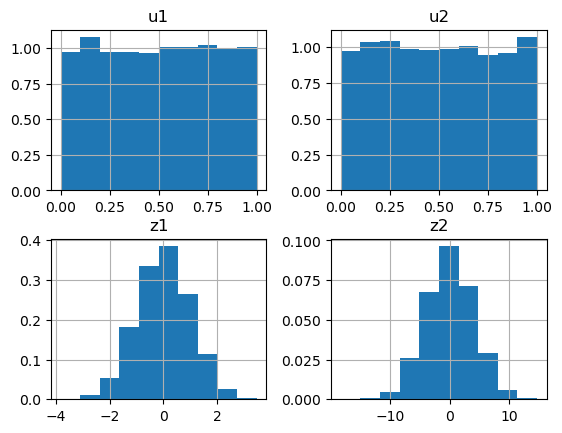

In [65]:
ax = df_rsamples.hist(density = True)
# ax

<AxesSubplot:xlabel='z', ylabel='PDF'>

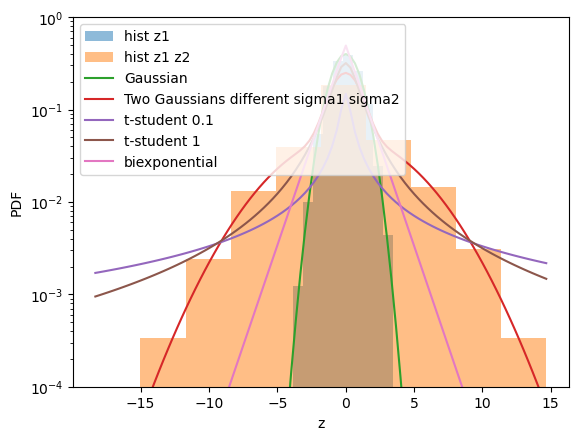

In [66]:
x_min = np.min([z1, z2]) #df_rsamples['z1'].min()
x_max = np.max([z1, z2])
x = np.linspace(x_min, x_max, num=100)

mu = 0
lbl_x = "z"
lbl_y = "PDF"
fig, ax = plt.subplots()
ax.hist(z1, density=True, alpha=0.5, label="hist z1")
ax.hist(np.concatenate([z1, z2]), density=True, alpha=0.5, label="hist z1 z2")
ax.plot(x, stats.norm.pdf(x, mu, sigma1), label="Gaussian")
ax.plot(x, 0.5*stats.norm.pdf(x, mu1, sigma1) + 0.5*stats.norm.pdf(x, mu2, sigma2), label="Two Gaussians different sigma1 sigma2" )
ax.plot(x, stats.t.pdf(x, 0.1), label="t-student 0.1" )
ax.plot(x, stats.t.pdf(x, 1), label="t-student 1" )
ax.plot(x, biexponential_pdf(x, 0, 1), label="biexponential" )
# ax.plot(x, gamma_pdf(x, 1, 1), label="gamma distribution" )
ax.set_xlabel(lbl_x)
ax.set_ylabel(lbl_y)
ax.set_yscale('log')
ax.set_ylim(1e-4, 1)
ax.legend()
ax
# x = np.linspace(
# ax[0][0].plot()

I want to create a latex equation $P(x|\theta) = \exp \left( -x^2 \right) / Z$

<AxesSubplot:>

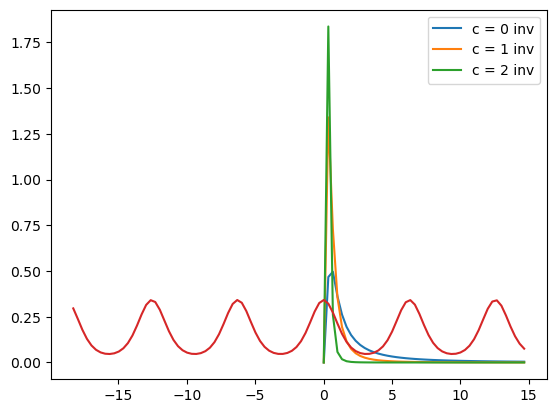

In [67]:
fig, ax = plt.subplots()
xp = x[x>0]
# for i in range(3):
#     str_lbl = "c = {}".format(i)
#     ax.plot(xp, gamma_pdf(xp, 1, 2**i), label = str_lbl)
for i in range(3):
    str_lbl = "c = {} inv".format(i)
    ax.plot(xp, inv_gamma_pdf(xp, 1, 2**i), label = str_lbl )

ax.plot(x, brownian_circle(x, 0, 1) )
# ax.plot(xp, gamma_pdf(xp, 1, 1), label="c=1" )
# ax.plot(xp, gamma_pdf(xp, 1, 2), label="c=2" )
# ax.plot(xp, gamma_pdf(xp, 1, 4), label="c=4" )
# ax.plot(xp, gamma_pdf(xp, 1, 8), label="c=8" )
# ax.plot(xp, gamma_pdf(xp, 1, 16), label="c=16" )
# ax.set_yscale("log")
# ax.set_ylim(1e-4, 2)
ax.legend()
ax

In [85]:
def beta_distribution(p, u1=1, u2=1):
    Z = gamma(u1)*gamma(u2)/gamma(u1 + u2)
    return ( p**(u1-1)*(1-p)**(u2 - 1)/Z )

/home/alfaceor/anaconda3/envs/statbiophys/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


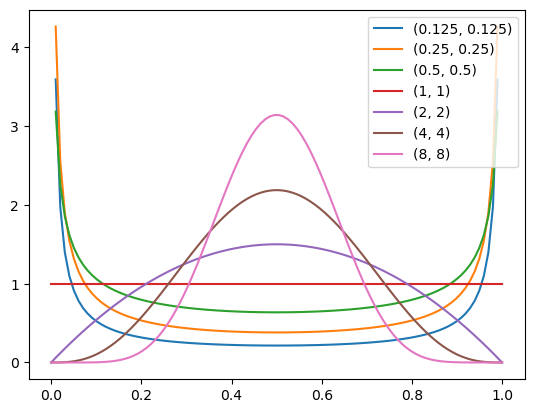

In [99]:
fig, ax = plt.subplots()
pp = np.linspace(0, 1, 100)

ax.plot(pp, beta_distribution(pp, u1=0.125, u2=0.125), label = "(0.125, 0.125)" )
ax.plot(pp, beta_distribution(pp, u1=0.25, u2=0.25), label = "(0.25, 0.25)" )
ax.plot(pp, beta_distribution(pp, u1=0.5, u2=0.5), label = "(0.5, 0.5)" )

ax.plot(pp, beta_distribution(pp, u1=1, u2=1), label = "(1, 1)" )

ax.plot(pp, beta_distribution(pp, u1=2, u2=2), label = "(2, 2)" )
ax.plot(pp, beta_distribution(pp, u1=4, u2=4), label = "(4, 4)" )
ax.plot(pp, beta_distribution(pp, u1=8, u2=8), label = "(8, 8)" )

ax.legend()

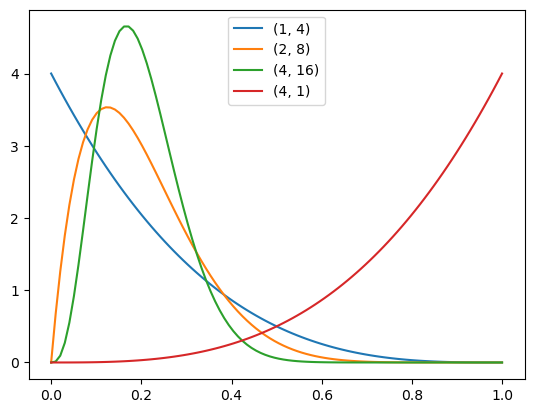

In [98]:
fig, ax = plt.subplots()
pp = np.linspace(0, 1, 100)

ax.plot(pp, beta_distribution(pp, u1=1, u2=4), label = "(1, 4)" )
ax.plot(pp, beta_distribution(pp, u1=2, u2=8), label = "(2, 8)" )
ax.plot(pp, beta_distribution(pp, u1=4, u2=16), label = "(4, 16)" )
ax.plot(pp, beta_distribution(pp, u1=4, u2=1), label = "(4, 1)" )
ax.legend()

In [ ]:
# entropic distribution


In [100]:
def Gaussian(x, mu=0, sigma=1):
    Z = 1/np.sqrt(2*np.pi*sigma)
    return ( exp(-(x-mu)**2/(2*sigma**2) ) )

In [37]:
np.concatenate([z1, z2])

array([ 0.54389553, -0.1980866 , -0.38992295, ..., -2.47202375,
       -0.26663504, -2.0109575 ])

In [38]:
# ?pd.DataFrame.hist
?np.linspace

Signature:
np.linspace(
    start,
    stop,
    num=50,
    endpoint=True,
    retstep=False,
    dtype=None,
    axis=0,
)
Docstring:
Return evenly spaced numbers over a specified interval.

Returns `num` evenly spaced samples, calculated over the
interval [`start`, `stop`].

The endpoint of the interval can optionally be excluded.

.. versionchanged:: 1.16.0
    Non-scalar `start` and `stop` are now supported.

.. versionchanged:: 1.20.0
    Values are rounded towards ``-inf`` instead of ``0`` when an
    integer ``dtype`` is specified. The old behavior can
    still be obtained with ``np.linspace(start, stop, num).astype(int)``

Parameters
----------
start : array_like
    The starting value of the sequence.
stop : array_like
    The end value of the sequence, unless `endpoint` is set to False.
    In that case, the sequence consists of all but the last of ``num + 1``
    evenly spaced samples, so that `stop` is excluded.  Note that the step
    size changes when `endpoint` is Fals

In [5]:
?np.random.uniform

Docstring:
uniform(low=0.0, high=1.0, size=None)

Draw samples from a uniform distribution.

Samples are uniformly distributed over the half-open interval
``[low, high)`` (includes low, but excludes high).  In other words,
any value within the given interval is equally likely to be drawn
by `uniform`.

.. note::
    New code should use the ``uniform`` method of a ``default_rng()``
    instance instead; please see the :ref:`random-quick-start`.

Parameters
----------
low : float or array_like of floats, optional
    Lower boundary of the output interval.  All values generated will be
    greater than or equal to low.  The default value is 0.
high : float or array_like of floats
    Upper boundary of the output interval.  All values generated will be
    less than or equal to high.  The default value is 1.0.
size : int or tuple of ints, optional
    Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
    ``m * n * k`` samples are drawn.  If size is ``None`` (default),
    a s